In [104]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('seg_rfm.csv') 

In [106]:
scaler = RobustScaler()

df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant']])

In [107]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

/Users/maximer/Documents/Dev/Python/Projets/segmentation_client_simplon/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maximer/Documents/Dev/Python/Projets/segmentation_client_simplon/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maximer/Documents/Dev/Python/Projets/segmentation_client_simplon/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maximer/Documents/Dev/Python/Projets/segmentation_client_simplon/venv/lib/python3.11/site-packag

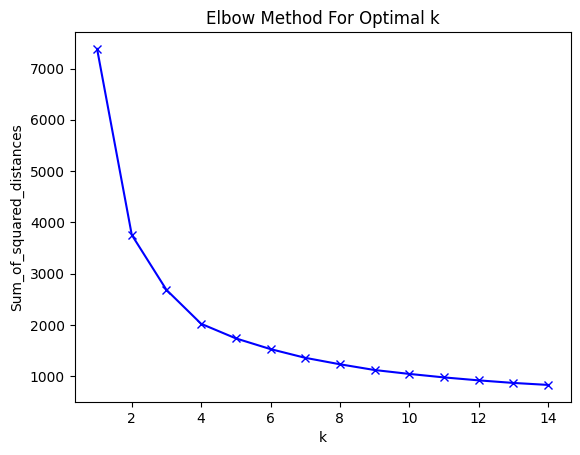

In [108]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


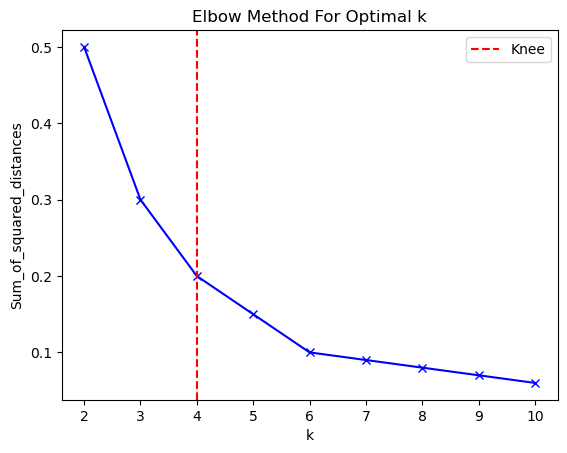

Valeur de k coude : 4


In [30]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = [0.5, 0.3, 0.2, 0.15, 0.1, 0.09, 0.08, 0.07, 0.06]

x = np.array(K)
y = np.array(Sum_of_squared_distances)

kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
k_value = kneedle.knee

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k_value, color='r', linestyle='--', label='Knee')
plt.legend()
plt.show()

print("Valeur de k coude :", k_value)


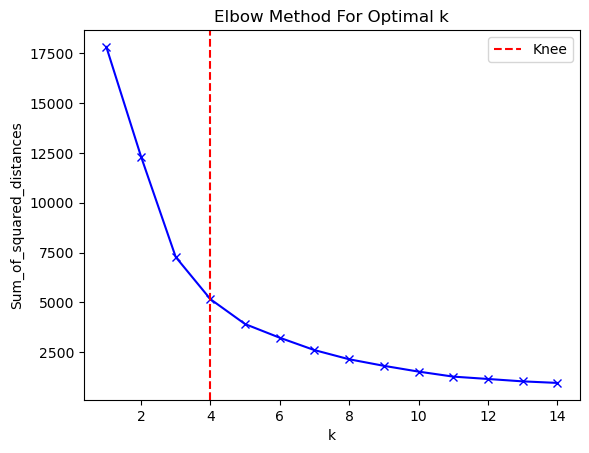

Valeur de k coude : 4


In [32]:
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



Sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

x = np.array(K)
y = np.array(Sum_of_squared_distances)

kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
k_value = kneedle.knee

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k_value, color='r', linestyle='--', label='Knee')
plt.legend()
plt.show()

print("Valeur de k coude :", k_value)


In [109]:
optimal_n = 3

kmeans = KMeans(n_clusters=optimal_n, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters


/Users/maximer/Documents/Dev/Python/Projets/segmentation_client_simplon/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


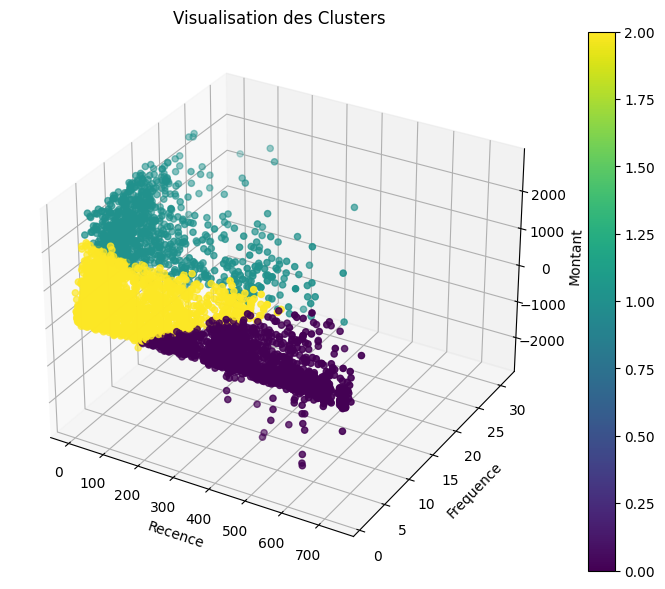

In [110]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()
